In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib

matplotlib.rcParams

matplotlib.rcParams['font.family']

current_font_list = matplotlib.rcParams['font.family']

font_path = 'C:\\Windows\\Fonts\\batang.ttc'

kfont = matplotlib.font_manager.FontProperties(fname=font_path).get_name()

matplotlib.rcParams['font.family'] = [kfont] + current_font_list

In [32]:
pd_data = pd.read_csv('시도별_의료인력_현황_20230416213816_dl2.csv', encoding='cp949', header=[0,1,2])

pd_data.head()

pd_data.columns

MultiIndex([('시점',  '시점',  '시점'),
            ('서울',  '의사', '일반의'),
            ('서울',  '의사', '전문의'),
            ('서울', '간호사',  '소계'),
            ('부산',  '의사', '일반의'),
            ('부산',  '의사', '전문의'),
            ('부산', '간호사',  '소계'),
            ('대구',  '의사', '일반의'),
            ('대구',  '의사', '전문의'),
            ('대구', '간호사',  '소계'),
            ('인천',  '의사', '일반의'),
            ('인천',  '의사', '전문의'),
            ('인천', '간호사',  '소계'),
            ('광주',  '의사', '일반의'),
            ('광주',  '의사', '전문의'),
            ('광주', '간호사',  '소계'),
            ('대전',  '의사', '일반의'),
            ('대전',  '의사', '전문의'),
            ('대전', '간호사',  '소계'),
            ('울산',  '의사', '일반의'),
            ('울산',  '의사', '전문의'),
            ('울산', '간호사',  '소계')],
           )

In [33]:
pd_data.set_index(('시점','시점','시점'), inplace=True)
pd_data = pd_data.stack(level=0)
pd_data.index.names = ['시점', '지역']
pd_data.columns = ['간호사', '일반의_의사', '전문의_의사']
pd_data = pd_data.reset_index()
df2 = pd_data.set_index(['시점','지역'])

df2 = df2.stack()
df3 = df2.reset_index()
df3.columns = ['시점', '지역', '직종', '인원수']


df3

,시점,지역,직종,인원수
0,2010,광주,간호사,4538
1,2010,광주,일반의_의사,91
2,2010,광주,전문의_의사,2024
3,2010,대구,간호사,6143
4,2010,대구,일반의_의사,138
...,...,...,...,...
247,2021,울산,일반의_의사,101
248,2021,울산,전문의_의사,1570
249,2021,인천,간호사,12656
250,2021,인천,일반의_의사,260


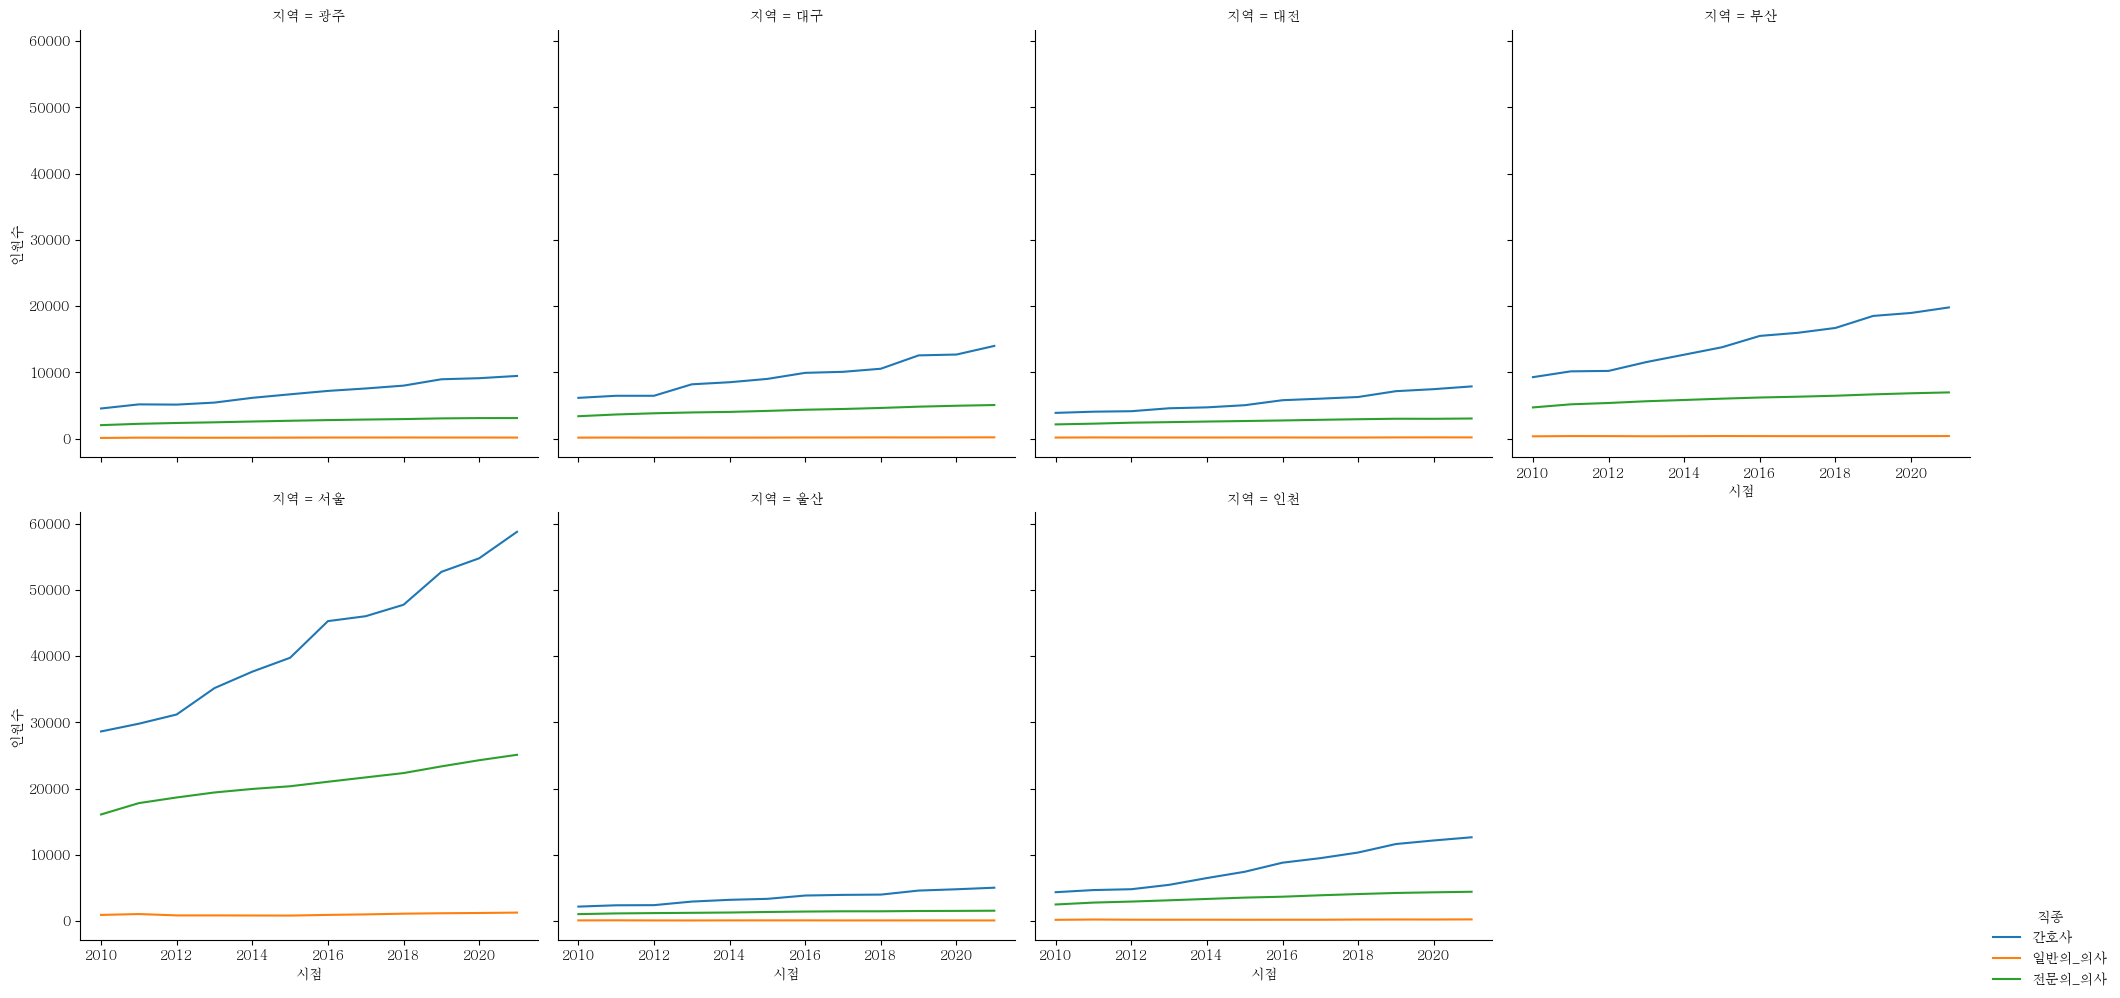

In [40]:
ax = sns.relplot(data=df3, x='시점', y='인원수', col='지역', col_wrap=4, hue='직종', kind='line')

sns.move_legend(ax, "lower right")